## Д/з

1. Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.
2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [34]:
# Загрузим игрушечный датасет из sklearn
X,y = datasets.load_iris(return_X_y=True)
X = iris.data
X.shape

(150, 4)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

/Users/maria/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

CONFUSION MATRIX

col_0   0   1  2
row_0           
0      11   0  0
1       0  12  1
2       0   0  6


In [20]:
from sklearn.decomposition import PCA

In [26]:
pca_my = PCA(n_components=3)

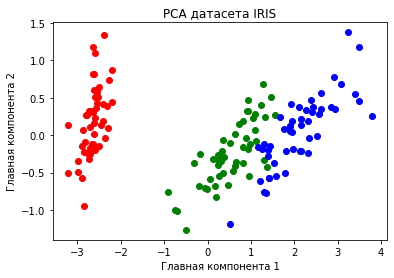

In [27]:
X_pca=pca_my.fit_transform(X)

plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [28]:

X_train_pca = pca_my.fit_transform(X_train)
X_test_pca = pca_my.transform(X_test)
LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca,y_train)
y_train_pca_pred = LR_pca.predict(X_train_pca)
y_test_pca_pred = LR_pca.predict(X_test_pca)

In [29]:
get_classification_report(y_train, y_train_pca_pred, y_test, y_test_pca_pred)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

CONFUSION MATRIX

col_0   0   1  2
row_0           
0      11   0  0
1       0  12  1
2       0   0  6


Задание 2. Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [85]:
U, D, V_T = np.linalg.svd(X, full_matrices=False)

In [86]:
V = V_T.T
V

array([[-0.75110816,  0.2841749 ,  0.50215472,  0.32081425],
       [-0.38008617,  0.5467445 , -0.67524332, -0.31725607],
       [-0.51300886, -0.70866455, -0.05916621, -0.48074507],
       [-0.16790754, -0.34367081, -0.53701625,  0.75187165]])

In [87]:
d = 2 #величина, которая показывает сколько признаков мы отбираем

In [88]:
D

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [89]:
#получаем индексы d максимальных элементов на диагонали матрицы D
ind = np.argpartition(D, -d)[-d:]

In [90]:
ind

array([1, 0])

In [91]:
W = V[:,ind]

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.2841749  -0.75110816]
 [ 0.5467445  -0.38008617]
 [-0.70866455 -0.51300886]
 [-0.34367081 -0.16790754]]


In [93]:
Z = X@W
Z

array([[ 2.30203322e+00, -5.91274714e+00],
       [ 1.97182599e+00, -5.57248242e+00],
       [ 2.09520636e+00, -5.44697714e+00],
       [ 1.87038151e+00, -5.43645948e+00],
       [ 2.32829018e+00, -5.87564494e+00],
       [ 2.32464996e+00, -6.47759822e+00],
       [ 2.07090423e+00, -5.51597520e+00],
       [ 2.14807482e+00, -5.85092859e+00],
       [ 1.77506408e+00, -5.15891972e+00],
       [ 1.99000106e+00, -5.64500117e+00],
       [ 2.42576813e+00, -6.26539771e+00],
       [ 2.02037338e+00, -5.75200785e+00],
       [ 1.97777558e+00, -5.48058085e+00],
       [ 2.04828749e+00, -4.95112411e+00],
       [ 2.91606081e+00, -6.52596417e+00],
       [ 2.82500759e+00, -6.79037199e+00],
       [ 2.60811578e+00, -6.27239468e+00],
       [ 2.26766614e+00, -5.92953789e+00],
       [ 2.38959506e+00, -6.64813130e+00],
       [ 2.36082303e+00, -6.09486463e+00],
       [ 2.12001187e+00, -6.25397363e+00],
       [ 2.27178150e+00, -6.07364677e+00],
       [ 2.49808604e+00, -5.36999813e+00],
       [ 1.